## 数据类型
首先我们来介绍TensorFlow 中的基本数据类型，它包含了数值型、字符串型和布尔型。
### 数值类型
❑ 标量(Scalar) 单个的实数，如1.2, 3.4 等，维度数(Dimension，也叫秩)为0，shape 为[]<br>
❑ 向量(Vector) n 个实数的有序集合，通过中括号包裹，如[1.2]，[1.2, 3.4]等，维度数为
1，长度不定，shape 为[𝑛]<br>
❑ 矩阵(Matrix) n 行m 列实数的有序集合，如[[1,2], [3,4]

维度数为2，每个维度上的长度不定，shape 为[𝑛, 𝑚]
❑ 张量(Tensor) 所有维度数dim > 2的数组统称为张量。张量的每个维度也做轴(Axis)，
一般维度代表了具体的物理含义，比如Shape 为[2,32,32,3]的张量共有4 维，如果表
示图片数据的话，每个维度/轴代表的含义分别是：图片数量、图片高度、图片宽度、
图片通道数，其中2 代表了2 张图片，32 代表了高宽均为32，3 代表了RGB 3 个通
道。张量的维度数以及每个维度所代表的具体物理含义需要由用户自行定义
在 TensorFlow 中间，为了表达方便，一般把标量、向量、矩阵也统称为张量，不作区
分，需要根据张量的维度数和形状自行判断。
首先来看标量在TensorFlow 是如何创建的：

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [1]:
a = 1.2
aa = tf.constant(1.2)# 创建标量
type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

In [17]:
x = tf.constant([1,2.,3.3])
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [6]:
x.numpy()

array([1. , 2. , 3.3], dtype=float32)

与标量不同，向量的定义须通过List 类型传给tf.constant()。创建一个元素的向量：

In [10]:
a = tf.constant([1.2])
a, a.shape

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2], dtype=float32)>,
 TensorShape([1]))

In [11]:
a = tf.constant([1,2, 3.])
a, a.shape

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 TensorShape([3]))

同样的方法定义矩阵

In [24]:
a = tf.constant([[1,2],[3,4]])
a, a.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>, TensorShape([2, 2]))

3维张量可以定义为：

In [26]:
a= tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]])
a

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])>

### 字符串类型
除了丰富的数值类型外，TensorFlow 还支持字符串(String)类型的数据，例如在表示图
片数据时，可以先记录图片的路径，再通过预处理函数根据路径读取图片张量。通过传入
字符串对象即可创建字符串类型的张量：

In [28]:
a = tf.constant('Hello, Deep Learning.')
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在tf.strings 模块中，提供了常见的字符串型的工具函数，如拼接join()，长度length()，切
分split()等等

In [30]:
tf.strings.lower(a)

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning.'>

深度学习算法主要还是以数值类型张量运算为主，字符串类型的数据使用频率较低，
我们不做过多阐述。

### 布尔类型
为了方便表达比较运算操作的结果，TensorFlow 还支持布尔类型(Boolean, bool)的张
量。布尔类型的张量只需要传入Python 语言的布尔类型数据，转换成TensorFlow 内部布
尔型即可：

In [39]:
a = tf.constant(True)
a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [32]:
a= tf.constant([True, False])
a

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

需要注意的是，TensorFlow 的布尔类型和Python 语言的布尔类型并不对等，不能通用：

In [47]:
a = tf.constant(True)
a == True

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## 数值精度
对于数值类型的张量，可以保持为不同字节长度的精度，如浮点数3.14 既可以保存为
16-bit 长度，也可以保存为32-bit 甚至64-bit 的精度。Bit 位越长，精度越高，同时占用的
内存空间也就越大。常用的精度类型有tf.int16, tf.int32, tf.int64, tf.float16, tf.float32,
tf.float64，其中tf.float64 即为tf.double。
在创建张量时，可以指定张量的保存精度：

In [49]:
a = tf.constant(123456789, dtype=tf.int16)
b = tf.constant(123456789, dtype=tf.int32)
a, b

(<tf.Tensor: shape=(), dtype=int16, numpy=-13035>,
 <tf.Tensor: shape=(), dtype=int32, numpy=123456789>)

可以看到，保存精度过低时，数据123456789 发生了溢出，得到了错误的结果，一般使用
tf.int32, tf.int64 精度。对于浮点数，高精度的张量可以表示更精准的数据，例如采用
tf.float32 精度保存𝜋时：

In [52]:
import numpy as np
print(np.pi)
tf.constant(np.pi, dtype=tf.float32)

3.141592653589793


<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

如果采用tf.float64 精度保存𝜋，则能获得更高的精度：

In [53]:
tf.constant(np.pi, dtype=tf.float64)

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

### 读取精度
通过访问张量的dtype 成员属性可以判断张量的保存精度：

In [55]:
print('before:',a.dtype)
if a.dtype != tf.float32:
    a = tf.cast(a,tf.float32) # 转换精度
print('after :',a.dtype)

before: <dtype: 'int16'>
after : <dtype: 'float32'>


对于某些只能处理指定精度类型的运算操作，需要提前检验输入张量的精度类型，并将不符合要求的张量进行类型转换。

### 类型转换
系统的每个模块使用的数据类型、数值精度可能各不相同，对于不符合要求的张量的
类型及精度，需要通过tf.cast 函数进行转换：

In [56]:
a = tf.constant(np.pi, dtype=tf.float16)
tf.cast(a, tf.double)

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

进行类型转换时，需要保证转换操作的合法性，例如将高精度的张量转换为低精度的张量
时，可能发生数据溢出隐患：

In [57]:
a = tf.constant(123456789, dtype=tf.int32)
tf.cast(a, tf.int16)

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

布尔型与整形之间相互转换也是合法的，是比较常见的操作：

In [58]:
a =  tf.constant([True, False])
tf.cast(a, tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

一般默认0 表示False，1 表示True，在TensorFlow 中，将非0 数字都视为True:

In [59]:
a = tf.constant([-1, 0, 1, 2])
tf.cast(a, tf.bool)

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

## 待优化张量
为了区分需要计算梯度信息的张量与不需要计算梯度信息的张量，TensorFlow 增加了
一种专门的数据类型来支持梯度信息的记录：tf.Variable。tf.Variable 类型在普通的张量类
型基础上添加了name，trainable 等属性来支持计算图的构建。由于梯度运算会消耗大量的
计算资源，而且会自动更新相关参数，对于不需要的优化的张量，如神经网络的输入X，
不需要通过tf.Variable 封装；相反，对于需要计算梯度并优化的张量，如神经网络层的W
和𝒃，需要通过tf.Variable 包裹以便TensorFlow 跟踪相关梯度信息。
通过 tf.Variable()函数可以将普通张量转换为待优化张量：

In [60]:
a = tf.constant([-1, 0, 1, 2])
aa = tf.Variable(a)
aa.name, aa.trainable

('Variable:0', True)

其中张量的name 和trainable 属性是Variable 特有的属性，name 属性用于命名计算图中的
变量，这套命名体系是TensorFlow 内部维护的，一般不需要用户关注name 属性；trainable
表征当前张量是否需要被优化，创建Variable 对象是默认启用优化标志，可以设置
trainable=False 来设置张量不需要优化<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;除了通过普通张量方式创建Variable，也可以直接创建：

In [61]:
a = tf.Variable([[1,2],[3,4]])
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

待优化张量可看做普通张量的特殊类型，普通张量也可以通过GradientTape.watch()方法临
时加入跟踪梯度信息的列表。

## 创建张量
在 TensorFlow 中，可以通过多种方式创建张量，如从Python List 对象创建，从
Numpy 数组创建，或者创建采样自某种已知分布的张量等。
### 从 Numpy, List 对象创建
Numpy Array 数组和Python List 是Python 程序中间非常重要的数据载体容器，很多数
据都是通过Python 语言将数据加载至Array 或者List 容器，再转换到Tensor 类型，通过
TensorFlow 运算处理后导出到Array 或者List 容器，方便其他模块调用。
通过 tf.convert_to_tensor 可以创建新Tensor，并将保存在Python List 对象或者Numpy
Array 对象中的数据导入到新Tensor 中：

In [62]:
tf.convert_to_tensor([1,2.])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [63]:
tf.convert_to_tensor(np.array([[1,2.],[3,4]]))

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

In [64]:
tf.constant(np.array([[1,2.],[3,4]]))

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

需要注意的是，Numpy 中浮点数数组默认使用64-Bit 精度保存数据，转换到Tensor 类型时
精度为tf.float64，可以在需要的时候转换为tf.float32 类型

实际上，tf.constant()和tf.convert_to_tensor()都能够自动的把Numpy 数组或者Python
List 数据类型转化为Tensor 类型，这两个API 命名来自TensorFlow 1.x 的命名习惯，在
TensorFlow 2 中函数的名字并不是很贴切，使用其一即可

### 创建全0，全1 张量
将张量创建为全0 或者全1 数据是非常常见的张量初始化手段。考虑线性变换
𝒚 = 𝑊𝒙 + 𝒃，将权值矩阵W 初始化为全1 矩阵，偏置b 初始化为全0 向量，此时线性变
化层输出𝒚 = 𝒙，是一种比较好的层初始化状态。通过tf.zeros()和tf.ones()即可创建任意形
状全0 或全1 的张量。例如，创建为0 和为1 的标量张量：

In [65]:
tf.zeros([]),tf.ones([])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

创建全0 和全1 的向量：

In [66]:
tf.zeros([1]),tf.ones([1])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

创建全0 的矩阵：

In [67]:
tf.zeros([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

创建全1 的矩阵：

In [68]:
tf.ones([3,2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

通过tf.zeros_like, tf.ones_like 可以方便地新建与某个张量shape 一致，内容全0 或全1
的张量。例如，创建与张量a 形状一样的全0 张量：

In [79]:
a = tf.ones([2,3])
tf.zeros_like(a)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

创建与张量a 形状一样的全1 张量

In [83]:
a = tf.zeros([3,2])
tf.zeros_like(a)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [84]:
tf.ones_like(a)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

tf.*_like 是一个便捷函数，可以通过tf.zeros(a.shape)等方式实现。

In [85]:
tf.zeros(a.shape)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

### 创建自定义数值张量

In [86]:
tf.fill([], -1)

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [88]:
# 创建所有元素为99 的矩阵：
tf.fill([2,2], 99)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]])>

### 创建已知分布的张量
　　正态分布(Normal Distribution，或Gaussian Distribution)和均匀分布(Uniform
Distribution)是最常见的分布之一，创建采样自这2 种分布的张量非常有用，比如在卷积神
经网络中，卷积核张量W 初始化为正态分布有利于网络的训练；在对抗生成网络中，隐藏
变量z 一般采样自均匀分布。<br>
　　通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为shape，均值为
mean，标准差为stddev 的正态分布𝒩(𝑚𝑒𝑎𝑛, 𝑠𝑡𝑑𝑑𝑒𝑣2)。例如，创建均值为0，标准差为1
的正太分布：

In [89]:
tf.random.normal([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4152311, -0.6203064],
       [-0.971219 , -0.3133385]], dtype=float32)>

创建均值为1，标准差为2 的正太分布：

In [90]:
tf.random.normal([2,2], mean=1,stddev=2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.3234441, 2.7735932],
       [4.1738286, 3.627927 ]], dtype=float32)>

　　通过tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自
[𝑚𝑖𝑛𝑣𝑎𝑙, 𝑚𝑎𝑥𝑣𝑎𝑙]区间的均匀分布的张量。例如创建采样自区间[0,1]，shape 为[2,2]的矩
阵：

In [97]:
tf.random.uniform([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.57283103, 0.7844522 ],
       [0.45233226, 0.40379906]], dtype=float32)>

创建采样自区间[0,10]，shape 为[2,2]的矩阵：

In [100]:
tf.random.uniform([2,2],minval=0,maxval=10)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[5.6195474, 5.876032 ],
       [0.5130398, 4.125701 ]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值maxval 参数，同时制定数
据类型为tf.int*型：

In [101]:
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[87, 28],
       [98, 66]])>

### 创建序列
在循环计算或者对张量进行索引时，经常需要创建一段连续的整形序列，可以通过
tf.range()函数实现。tf.range(limit, delta=1)可以创建[0, 𝑙𝑖𝑚𝑖𝑡)之间，步长为delta 的整形序
列，不包含limit 本身。例如，创建0~9，步长为1 的整形序列：

In [102]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

创建0~9，步长为2 的整形序列：

In [104]:
tf.range(10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

通过tf.range(start, limit, delta=1)可以创建[𝑠𝑡𝑎𝑟𝑡, 𝑙𝑖𝑚𝑖𝑡)，步长为delta 的序列，不包含limit
本身：

In [105]:
tf.range(1,10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

## 张量的典型应用
在介绍完张量的相关属性和创建方式后，我们将介绍每种维度下张量的典型应用，让
读者在看到每种张量时，能够直观地联想到它主要的物理意义和用途，对后续张量的维度
变换等一系列抽象操作的学习打下基础。
本节在介绍典型应用时不可避免地会提及后续将要学习的网络模型或算法，学习时不
需要完全理解，有初步印象即可。
### 标量
在 TensorFlow 中，标量最容易理解，它就是一个简单的数字，维度数为0，shape 为
[]。标量的典型用途之一是误差值的表示、各种测量指标的表示，比如准确度(Accuracy,
acc)，精度(Precision)和召回率(Recall)等。
考虑某个模型的训练曲线，如图 4.1 所示，横坐标为训练Batch 步数Step，纵坐标分
别为误差变化趋势(图 4.1(a))和准确度变化趋势曲线(图 4.1(b))，其中损失值loss 和准确度
均由张量计算产生，类型为标量。

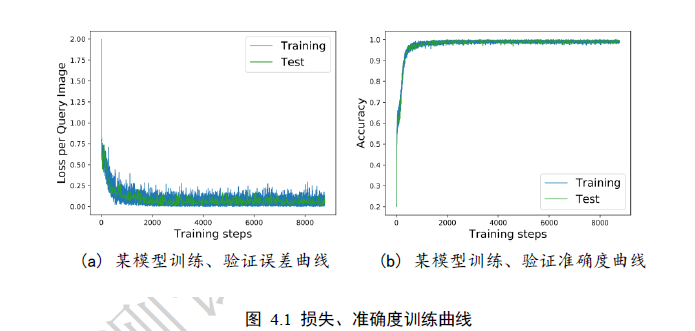

以均方差误差函数为例，经过tf.keras.losses.mse(或tf.keras.losses.MSE)返回每个样本
上的误差值，最后取误差的均值作为当前batch 的误差，它是一个标量：

In [117]:
out = tf.random.uniform([4,10]) #随机模拟网络输出
y = tf.constant([2,3,2,0]) # 随机构造样本真实标签
y = tf.one_hot(y, depth=10) # one-hot 编码
loss = tf.keras.losses.mse(y, out) # 计算每个样本的MSE
loss = tf.reduce_mean(loss) # 平均MSE
print(loss)

tf.Tensor(0.32271004, shape=(), dtype=float32)


### 向量
向量是一种非常常见的数据载体，如在全连接层和卷积神经网络层中，偏置张量𝒃就
使用向量来表示。如图 4.2 所示，每个全连接层的输出节点都添加了一个偏置值，把所有
输出节点的偏置表示成向量形式：𝒃 = [𝑏1, 𝑏2]𝑇。
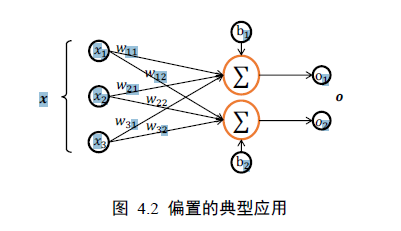

考虑 2 个输出节点的网络层，我们创建长度为2 的偏置向量𝒃，并累加在每个输出节点
上：

In [134]:
# z=wx,模拟获得激活函数的输入z
z = tf.random.normal([4,2])
b = tf.zeros([2])
z = z + b
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.9823838 , -0.64392203],
       [-1.42177   , -1.3180375 ],
       [-1.0074537 ,  1.785742  ],
       [ 0.21090591, -0.45541406]], dtype=float32)>

注意到这里shape 为[4,2]的𝒛和shape 为[2]的𝒃张量可以直接相加，这是为什么呢？让我们
在Broadcasting 一节为大家揭秘。
通过高层接口类Dense()方式创建的网络层，张量W 和𝒃存储在类的内部，由类自动创
建并管理。可以通过全连接层的bias 成员变量查看偏置变量𝒃，例如创建输入节点数为4，
输出节点数为3 的线性层网络，那么它的偏置向量b 的长度应为3：

In [133]:
fc = tf.keras.layers.Dense(3) # 创建一层Wx+b，输出节点为3
# 通过build 函数创建W,b 张量，输入节点为4
fc.build(input_shape=(2,4))
fc.bias # 查看偏置

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

可以看到，类的偏置成员bias 初始化为全0，这也是偏置𝒃的默认初始化方案。

### 矩阵
矩阵也是非常常见的张量类型，比如全连接层的批量输入𝑋 = [𝑏, 𝑑𝑖𝑛 ]，其中𝑏表示输入
样本的个数，即batch size，𝑑𝑖𝑛表示输入特征的长度。比如特征长度为4，一共包含2 个样
本的输入可以表示为矩阵：

In [135]:
x = tf.random.normal([2,4])

令全连接层的输出节点数为3，则它的权值张量W 的shape 为[4,3]:

In [138]:
w = tf.ones([4,3]) # 定义W 张量
b = tf.zeros([3]) # 定义b 张量
o = x@w+b # X@W+b 运算
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.50894046, 0.50894046, 0.50894046],
       [1.8639933 , 1.8639933 , 1.8639933 ]], dtype=float32)>

其中X，W 张量均是矩阵。x@w+b 网络层称为线性层，在TensorFlow 中可以通过Dense
类直接实现，Dense 层也称为全连接层。我们通过Dense 类创建输入4 个节点，输出3 个
节点的网络层，可以通过全连接层的kernel 成员名查看其权值矩阵W：

In [139]:
fc = tf.keras.layers.Dense(3) # 定义全连接层的输出节点为3
fc.build(input_shape=(2,4)) # 定义全连接层的输入节点为4
fc.kernel

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.26687157,  0.61750174, -0.8875135 ],
       [-0.76247925, -0.6441561 , -0.82430005],
       [ 0.8485062 ,  0.32162678,  0.02503222],
       [ 0.9131967 ,  0.05722672,  0.6556673 ]], dtype=float32)>

### 3维张量

三维的张量一个典型应用是表示序列信号，它的格式是
𝑋 = [𝑏, 𝑠𝑒𝑞𝑢𝑒𝑛𝑐𝑒 𝑙𝑒𝑛, 𝑓𝑒𝑎𝑡𝑢𝑟𝑒 𝑙𝑒𝑛]
其中𝑏表示序列信号的数量，sequence len 表示序列信号在时间维度上的采样点数，feature
len 表示每个点的特征长度。<br>
　　考虑自然语言处理中句子的表示，如评价句子的是否为正面情绪的情感分类任务网
络，如图 4.3 所示。
(Embedding Layer)编码为固定长度的向量，比如“a”编码为某个长度3 的向量，那么2 个
等长(单词数为5)的句子序列可以表示为shape 为[2,5,3]的3 维张量，其中2 表示句子个
数，5 表示单词数量，3 表示单词向量的长度：

In [3]:
# 自动加载IMDB 电影评价数据集
import os 
imdb_path = os.path.join(os.getcwd(),'data/imdb.npz')
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.imdb.load_data(path=imdb_path,num_words=10000)

In [178]:
# 将句子填充、截断为等长80 个单词的句子
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

(25000, 80)

可以看到x_train 张量的shape 为[25000,80]，其中25000 表示句子个数，80 表示每个句子
共80 个单词，每个单词使用数字编码方式。我们通过layers.Embedding 层将数字编码的单
词转换为长度为100 个词向量：

In [179]:
In [47]: # 创建词向量Embedding 层类
embedding=tf.keras.layers.Embedding(10000, 100)
# 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

可以看到，经过Embedding 层编码后，句子张量的shape 变为[25000,80,100]，其中100 表
示每个单词编码为长度100 的向量。
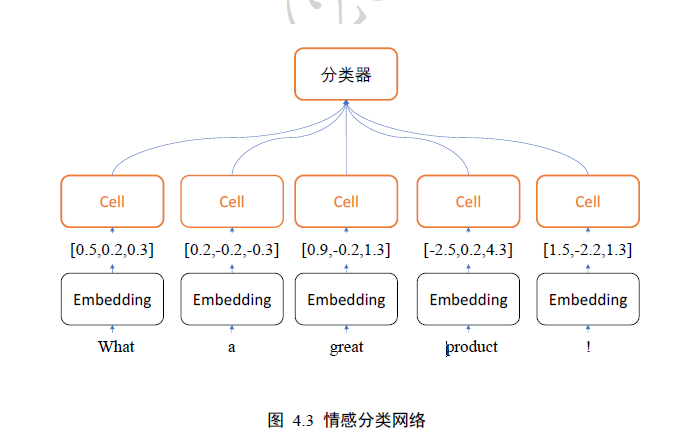
对于特征长度为1 的序列信号，比如商品价格在60 天内的变化曲线，只需要一个标量
即可表示商品的价格，因此2 件商品的价格变化趋势可以使用shape 为[2,60]的张量表示。
为了方便统一格式，也将价格变化趋势表达为shape 为 [2,60,1]的张量，其中的1 表示特
征长度为1。

### 4 维张量
我们这里只讨论3/4 维张量，大于4 维的张量一般应用的比较少，如在元学习(meta
learning)中会采用5 维的张量表示方法，理解方法与3/4 维张量类似。<br>
　　4 维张量在卷积神经网络中应用的非常广泛，它用于保存特征图(Feature maps)数据，
格式一般定义为<br>
[𝑏, ℎ, , 𝑐]
其中𝑏表示输入的数量，h/w分布表示特征图的高宽，𝑐表示特征图的通道数，部分深度学
习框架也会使用[𝑏, 𝑐, ℎ, ]格式的特征图张量，例如PyTorch。图片数据是特征图的一种，
对于含有RGB 3 个通道的彩色图片，每张图片包含了h 行w 列像素点，每个点需要3 个数
值表示RGB 通道的颜色强度，因此一张图片可以表示为[h, w, 3]。如图 4.4 所示，最上层
的图片表示原图，它包含了下面3 个通道的强度信息。
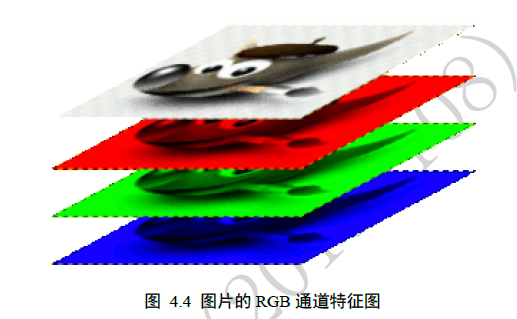
神经网络中一般并行计算多个输入以提高计算效率，故𝑏张图片的张量可表示为
[𝑏, ℎ, , 3]。

In [152]:
# 创建32x32 的彩色图片输入，个数为4
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = tf.keras.layers.Conv2D(16,kernel_size=3)
out = layer(x) # 前向计算
out.shape # 输出大小

TensorShape([4, 30, 30, 16])

其中卷积核张量也是4 维张量，可以通过kernel 成员变量访问：

In [153]:
layer.kernel.shape

TensorShape([3, 3, 3, 16])